## **Monotonic Stack : NGL NGR NSL NSR**

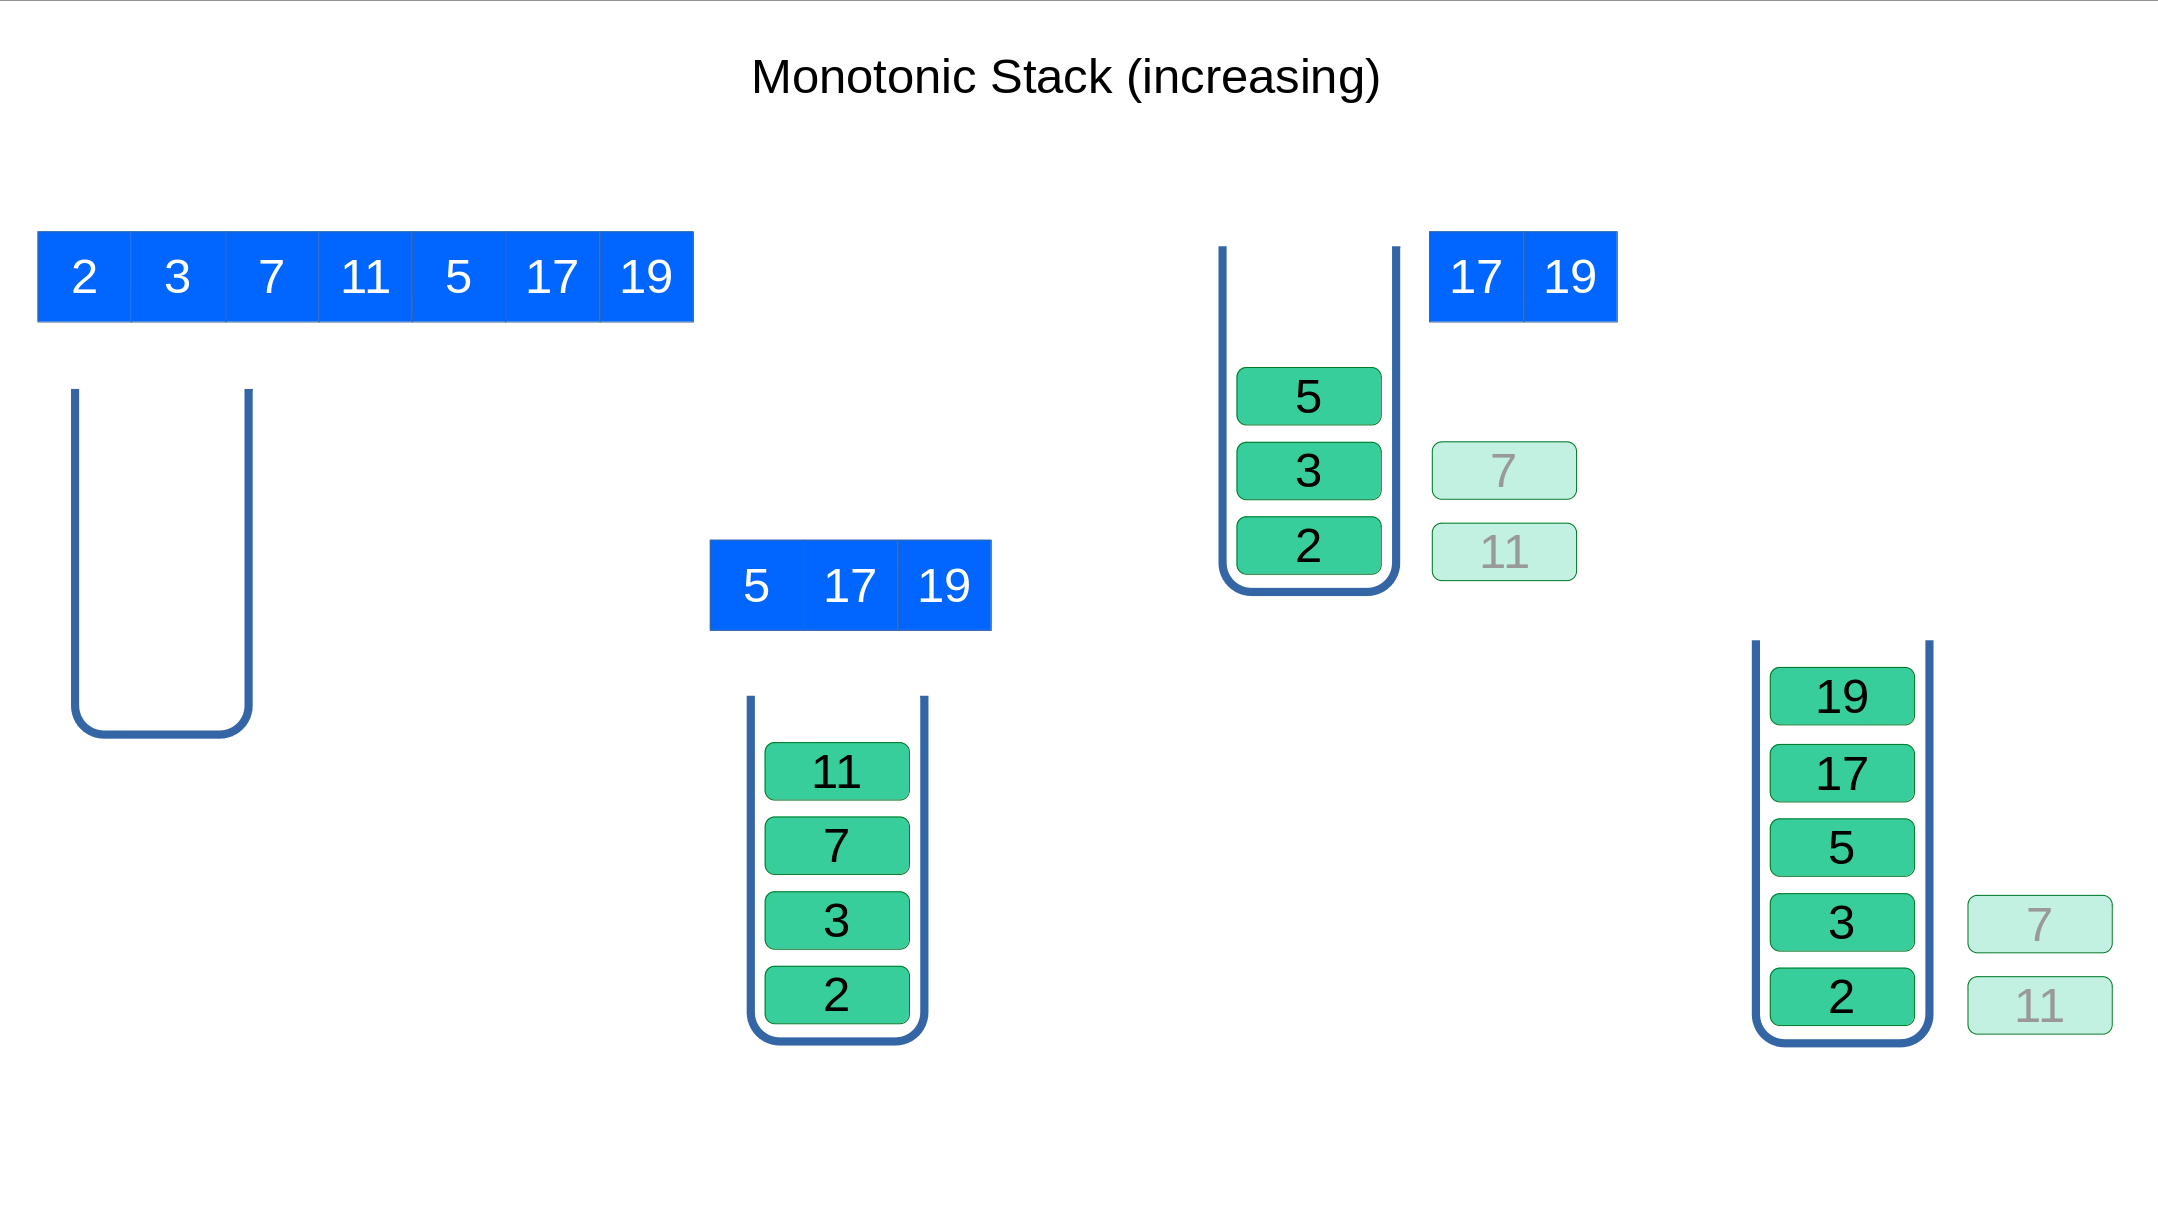


1. NGL
2. NSL

**For both traverse the array from 0 to (n-1)**

1. NGR
2. NSR

**For both traverse the array from (n-1) to 0**

**Initialize the final array with (element = -1,index = -1)**

1. For G stack should contain greater Number than current elemnet, if not then keep on popping 
   until stack is empty.

   **while(S and S[0][0] <= curnum) : pop()**

   For S stack should contain smaller Number than current elemnet, if not then keep on popping 
   until stack is empty.

   **while(not S and S[0][0] >= curnum) : pop()**

2. if stack not empty then put the **stack top** that to result array

   **if(S): res <- S.top()** 

3. push the cur element and its index to the stack

   **S.push((curnum,idx))** 





In [1]:
from collections import deque as dq

In [5]:

def NGL(arr):
    
    n = len(arr)
    
    S = []
    
    V = [(-1,-1) for _ in range(n)]
    
    for i in range(n):
        
        while(S and S[-1][0] <= arr[i]):
            S.pop()
        
        if(S): 
            V[i] = S[-1]
            
        S.append((arr[i],i))
        
    return V


arr = [4,5,2,0,9,7,3]

V = NGL(arr)

print(V)

[(-1, -1), (-1, -1), (5, 1), (2, 2), (-1, -1), (9, 4), (7, 5)]


In [7]:

def NSR(arr):
    
    n = len(arr)
    
    S = []
    
    V = [(-1,-1) for _ in range(n)]
    
    for i in range(n-1,-1,-1):
        
        while(S and S[-1][0] >= arr[i]):
            S.pop()
        
        if(S): 
            V[i] = S[-1]
            
        S.append((arr[i],i))
        
    return V


arr = [4,5,2,0,9,7,3]

V = NSR(arr)

print(V)

[(2, 2), (2, 2), (0, 3), (-1, -1), (7, 5), (3, 6), (-1, -1)]


## **Valid Parantheses**

In [8]:
class Solution:
    def isValid(self, s: str) -> bool:
        stack = []

        n = len(s)

        if(n==0): return True

        if(n==1): return False

        for c in s:

            if ((c==')' or c=='}' or c==']') and not stack): 
                return False
            
            elif (c=='(' or c=='{' or c=='['):
                stack.append(c)

            elif ((stack[-1] == '(' and c == ')') or (stack[-1] == '{' and c == '}') or (stack[-1] == '[' and c == ']')):
                stack.pop()

            else:
                return False
            
        return len(stack)==0

## **Next Greater Element I**

You are given two distinct 0-indexed integer arrays nums1 and nums2, where nums1 is a subset of nums2.

1. Find NGR for second array and store the result in a Map(dict)
2. for first array find the NGR from map and return the res

In [ ]:
class Solution:
    def nextGreaterElement(self, nums1, nums2):

        S = []
        n = len(nums2)

        D = {num : -1 for num in nums2}

        for i in range(n-1,-1,-1):

            while(S and S[-1] <= nums2[i]):
                S.pop()

            if(S):
                D[nums2[i]] = S[-1]
            
            S.append(nums2[i])

        res = []

        for num in nums1:
            res.append(D[num])

        return res

## **Sort a Stack**

**Algorithm: O(N^2)**

2 Recursion Function Needed : 

**1. Sort()**

**2. insertAtPosition()**

1. Take the top element.

2. Ask **Recursion to sort the remaining stack.**

3. Place the top element at its Correct Position using insertAtPlace Function.

4. Inside Function: **insertAtPlace()**

    1. If stack is empty place the passed element at bottom.

    2. As we asked recursion to sort the remaining stack therefore the remaining stack is sorted, Hence if the top of stack is smaller than passed val then it is correct position for the val.

    3. If top > val then we take out the top element. Ask recursion to place val in remaining stack.

    4. After recursion placing the val at correct position we again place top of stack at top.

In [ ]:
class Solution:
    
    def inserAtPos(self,item):
        
        if(not self.arr or self.arr[-1] <= item):
            self.arr.append(item)
            return
            
        temp = self.arr.pop()
        self.inserAtPos(item)
        self.arr.append(temp)
        
        
    def recSort(self):
        
        if(not self.arr): return
        
        if(len(self.arr) == 1): return 
        
        item = self.arr.pop()
        
        self.recSort()
        
        self.inserAtPos(item)
    
    def Sorted(self, s):        
        
        self.arr = s
        
        self.recSort()
        
        s = self.arr

#### **Using Heap : O(N^2logN)**

In [ ]:
import heapq as hq

class Solution:
    def Sorted(self, s):
        
        arr = []
        
        while(s):
            hq.heappush(arr,s.pop())
            
        
        while(arr):
            x = hq.heappop(arr)
            s.append(x)
            
        return s

## **901. Online Stock Span**

### Algorithm : Monotonic Stack

1. maintain (price, span) in stack
2. then NGL


In [ ]:
class StockSpanner:
    
    def __init__(self):
        self.S = []
    
    def NGL(self,price):
        span = 1
        while(self.S and self.S[-1][0] <= price):
            (_,sp) = self.S.pop()
            span += sp 

        self.S.append((price,span))
        return span

    def next(self, price: int) -> int:
        return self.NGL(price)

## **Max Area Histogram**

1. Initialize res array with -1 and compute **NSL**.

2. Initialize res array with n and compute **NSR**.

3. at every index we calculate area = **(R[i] - L[i] - 1) x Arr[i]**

### **It actually calculate spans of current height (from which idx from L upto which id at R current height can be populated).** 

**1. L[i] -> Left Span**

**2. R[i] -> Right Span**
    
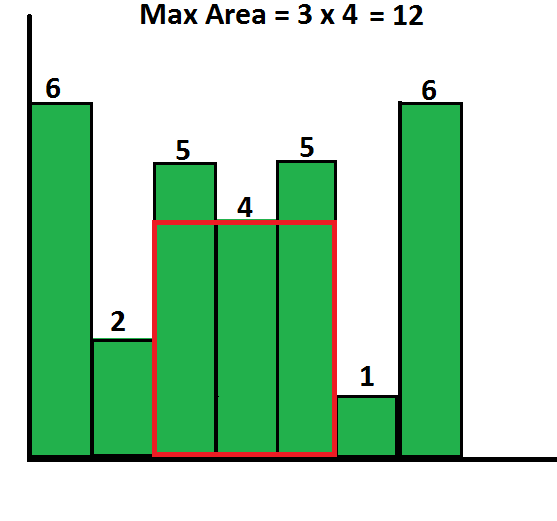

In [10]:
def NSL(arr):
    
    n = len(arr)
    S = []
    V = [-1 for _ in range(n)]
    
    for i  in range(n):
        
        while(S and S[-1][0] >= arr[i]):
            S.pop()
        
        if(S):
            V[i] = S[-1][1]
            
        S.append((arr[i],i))
    
    return V 
    
def NSR(arr):
    
    n = len(arr)
    S = []
    V = [n for _ in range(n)]
    
    for i  in range(n-1,-1,-1):
        
        while(S and S[-1][0] >= arr[i]):
            S.pop()
        
        if(S):
            V[i] = S[-1][1]
            
        S.append((arr[i],i))
    
    return V 


def MAH(arr):
    
    ans = 0
    
    n = len(arr)
    
    Rspan = NSR(arr=arr)
    Lspan = NSL(arr=arr)
    
    for i in range(n):
        
        curarea = (Rspan[i] - Lspan[i] -1) * arr[i]
        ans = max(ans,curarea)
        
    return ans  
    

In [12]:
arr = [6,2,5,4,5,1,6]

print(MAH(arr))

arr = [3, 5, 1, 7, 5, 9]

print(MAH(arr))


12
15


## **Trapping Rain Water**

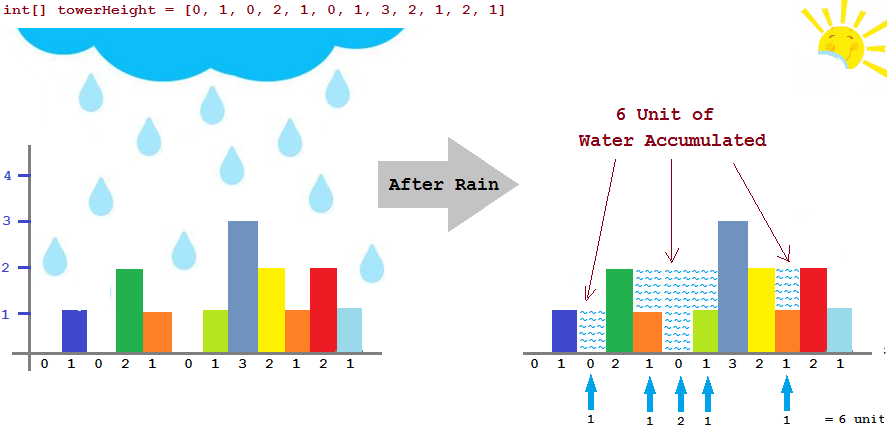

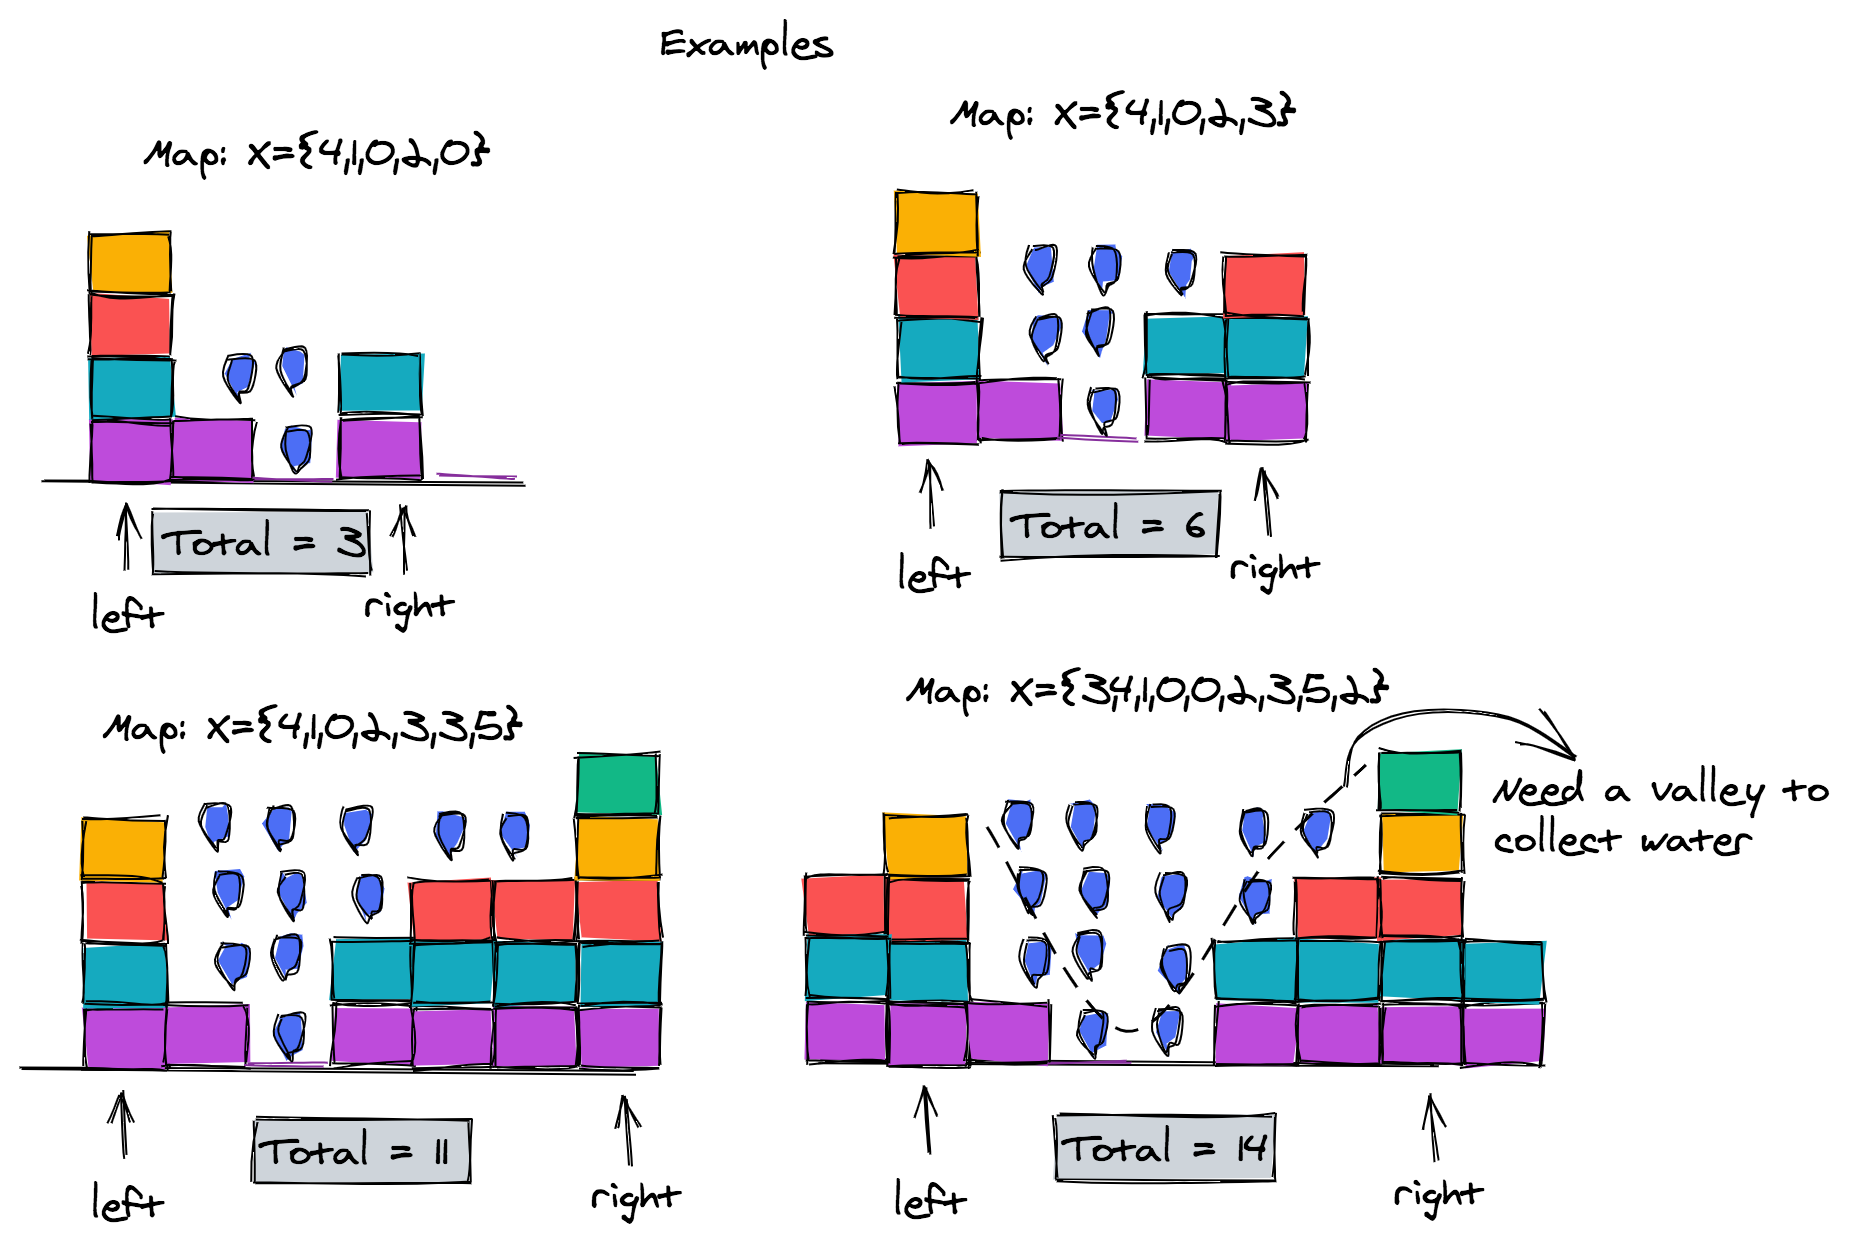

**1. Calculate Greatest Height to Left of every element. if not present then keep the current elemnt at that position. -> GreatestToLeft**  : Highest Wall on Right

**2. Calculate Greatest Height to Right of every element. if not present then keep the current elemnt at that position. -> GreatestToRight** : Highest Wall on Left

3. Now at index we calculate how much water it can contain :

    **min(RG[i],L[i])** -> gives the highest water level for that index

    Then subtract the **own height(arr[i])** to calculate actual water it contains in that idx

    **water at i = min(RG[i],L[i]) - arr[i]**

4. keep on adding all the water for every idx. 



In [13]:
def WaterTrapping(arr):
    
    n = len(arr)
    
    larr = [-1 for i in range(n)]
    larr[0] = arr[0]
    
    rarr = [-1 for i in range(n)]
    rarr[n-1] = arr[n-1]
    
    for i in range(1,n):
        
        larr[i] = max(larr[i-1],arr[i])
        
    for i in range(n-2,-1,-1):
        
        rarr[i] = max(rarr[i+1],arr[i])
        
    water = 0
    
    for i in range(n):
        
        water += min(larr[i],rarr[i]) - arr[i]
        
    return water
    

In [15]:
arr = [3, 0, 2, 0, 4]
res = WaterTrapping(arr)
print(res)

arr = [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]
res = WaterTrapping(arr)
print(res)

7
6


## **Maximal Rectangle in a Binary Matrix**

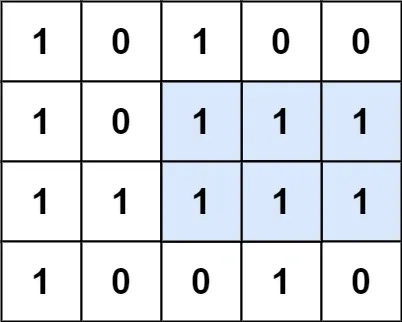

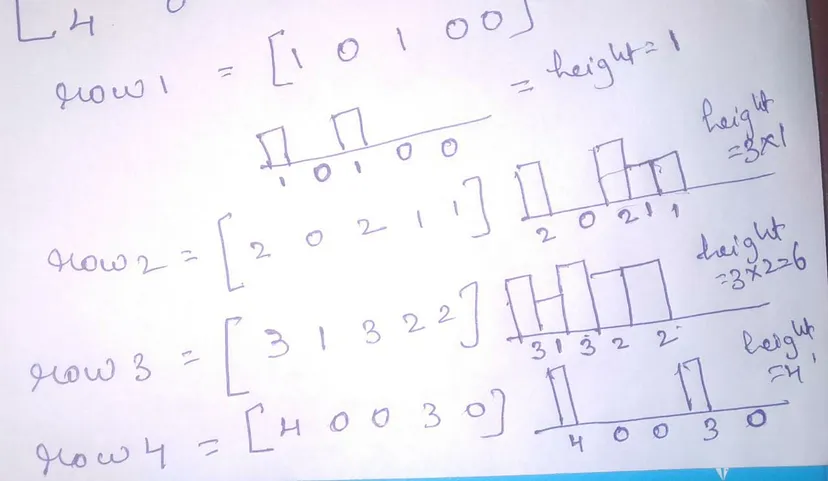

1. we claculate **MAH** for every row starts from base

2. for first row (V) we calculate **MAH** explicitly

3. then we update V as follows:

    a. **if mat[i][j] == 0 then V[j] = 0** (as if 0 comes even after 1 then it can't be part of the rectangle anymore)

    b. if **mat[i][j] == 1 then V[j] += mat[i][j]**

In [29]:
def NSL(arr):
    
    n = len(arr)
    S = []
    V = [-1 for _ in range(n)]
    
    for i  in range(n):
        
        while(S and S[-1][0] >= arr[i]):
            S.pop()
        
        if(S):
            V[i] = S[-1][1]
            
        S.append((arr[i],i))
    
    return V 
    
def NSR(arr):
    
    n = len(arr)
    S = []
    V = [n for _ in range(n)]
    
    for i  in range(n-1,-1,-1):
        
        while(S and S[-1][0] >= arr[i]):
            S.pop()
        
        if(S):
            V[i] = S[-1][1]
            
        S.append((arr[i],i))
    
    return V 


def MAH(arr):
    
    ans = 0
    
    n = len(arr)
    
    Rspan = NSR(arr=arr)
    Lspan = NSL(arr=arr)
    
    for i in range(n):
        
        curarea = (Rspan[i] - Lspan[i] -1) * arr[i]
        ans = max(ans,curarea)
        
    return ans  
    

def MaximalArea(matrix):
    
    n = len(matrix)
    m = len(matrix[0])
    
    V = []
    
    for j in range(m):
        V.append(int(matrix[0][j]))
        
    mah = MAH(V)
        
    for i in range(1,n):
        for j in range(m):
            
            if matrix[i][j] == '0':
                
                V[j] = 0
            
            else:
                
                V[j] += int(matrix[i][j])
        
        mah = max(mah,MAH(V))
        
    return mah

In [30]:
matrix = [["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]]

ans = MaximalArea(matrix=matrix)

print(ans)

6
